In [ ]:
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

from sklearn.preprocessing import StandardScaler, RobustScaler

from scipy.sparse import random
from scipy import stats

In [ ]:
## Setup working directory and data directory
DIR = '/content/drive/MyDrive/Colab Notebooks/MAHE/MSIS Coursework/OddSem2022MAHE/ForStudents/'
DATA_DIR = DIR + 'Data/'

In [ ]:
# Load data
FILE = DATA_DIR + 'ecg_missing.txt'
df_ecg = pd.read_csv("/content/ecg_missing.txt", header = None, names = ['ecgvalues'])
#df_ecg.head()
print(type(df_ecg['ecgvalues'].values[0]))
df_ecg['ecgvalues'] = df_ecg['ecgvalues'].astype(float)
print(type(df_ecg['ecgvalues'].values[0]))

<class 'str'>
<class 'numpy.float64'>


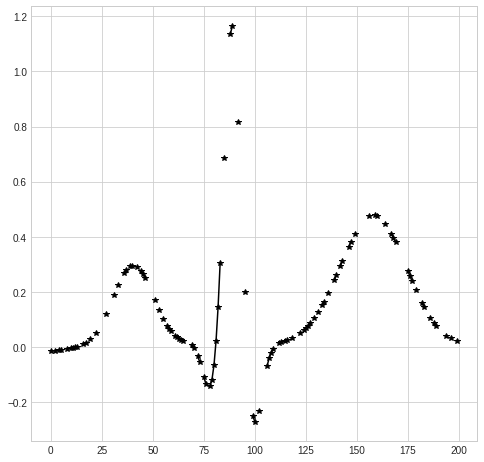

In [ ]:
# Component plot of the ecg signal
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
component_index = range(0, len(df_ecg['ecgvalues']))
ax.plot(component_index, df_ecg['ecgvalues'], color = 'black', marker = '*')

In [ ]:
# Extract the indices corresponding to the missing ECG values
t_unknown = df_ecg[df_ecg['ecgvalues'].isnull()].index

# Extract the indices corresponding to the known ECG values
t_known = df_ecg[~df_ecg['ecgvalues'].isnull()].index

In [ ]:
# Build a vector of known ecg_signal values
x_known = df_ecg[~df_ecg['ecgvalues'].isnull()].values
print(x_known)

In [ ]:
I = np.eye(len(df_ecg))
S1 = I[:, t_known]
S2 = I[:, t_unknown]
S1

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Build the second-difference matrix D
n = len(df_ecg) # size of the signal
a = 1*np.ones(n-1)
b = -2*np.ones(n)
D = np.diag(a, -1) + np.diag(b) + np.diag(a, 1)
D = D[1:-1, :]
D.shape
n

200

In [ ]:
# Reconstruct the ECG signal such that it is smooth
A = np.dot(D, S2)
b = np.dot(np.dot(-D, S1), x_known)
v = linalg.lstsq(A, b)
#print(v[0].flatten().shape)
df_ecg.loc[t_unknown, 'ecgvalues'] =  v[0].flatten()

In [ ]:
# Check if there are any missing values
#um(df_ecg['ecgvalues'].isnull())

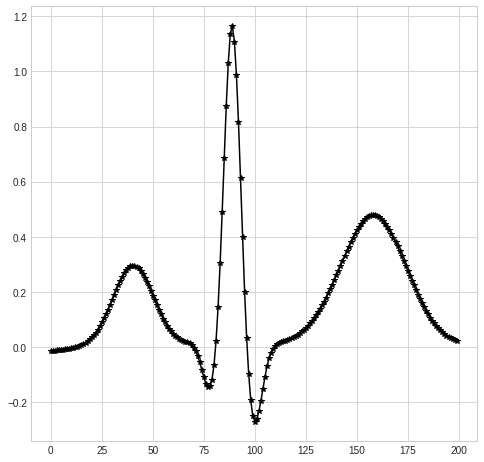

In [ ]:
# Component plot of the reconstructed ecg signal
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
component_index = range(0, len(df_ecg['ecgvalues']))
ax.plot(component_index, df_ecg['ecgvalues'], color = 'black', marker = '*')